<h3>Outlier Detection And Removal Using IQR</h3>

this method used when data is not normally distributed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


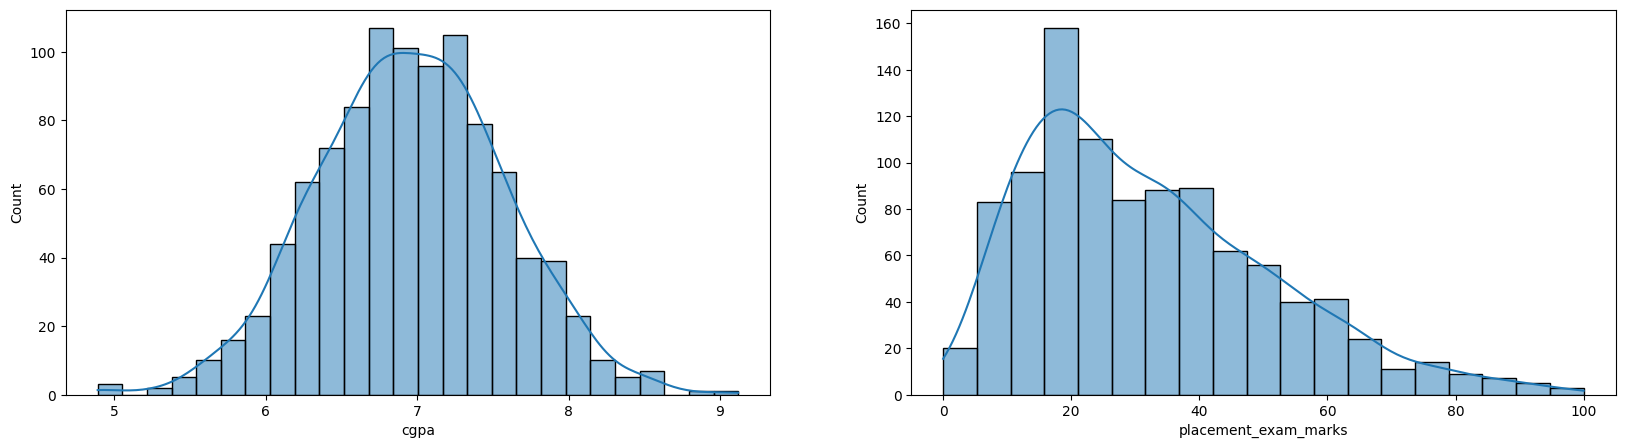

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.histplot(df["cgpa"],kde=True)
plt.subplot(122)
sns.histplot(df["placement_exam_marks"],kde=True)
plt.show()

In [41]:
# we have to see outliers in placement_exam_marks column 
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

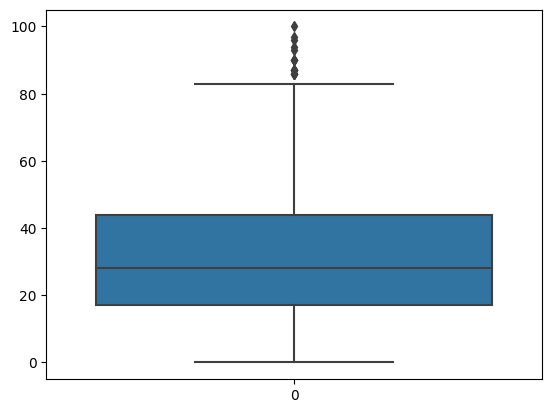

In [42]:
sns.boxplot(df["placement_exam_marks"])

In [43]:
#finding IQR
lower_quartile = df["placement_exam_marks"].quantile(0.25)
upper_quartile = df["placement_exam_marks"].quantile(0.75)


In [44]:
iqr = upper_quartile - lower_quartile
iqr

27.0

In [45]:
lower_limit = lower_quartile - 1.5*iqr
upper_limit = upper_quartile + 1.5*iqr

In [46]:
lower_limit,upper_limit

(-23.5, 84.5)

In [47]:
df[df["placement_exam_marks"]>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [48]:
df[df["placement_exam_marks"]<lower_limit]

,cgpa,placement_exam_marks,placed


In [49]:
# Trimming
new_df = df[(df["placement_exam_marks"]<upper_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


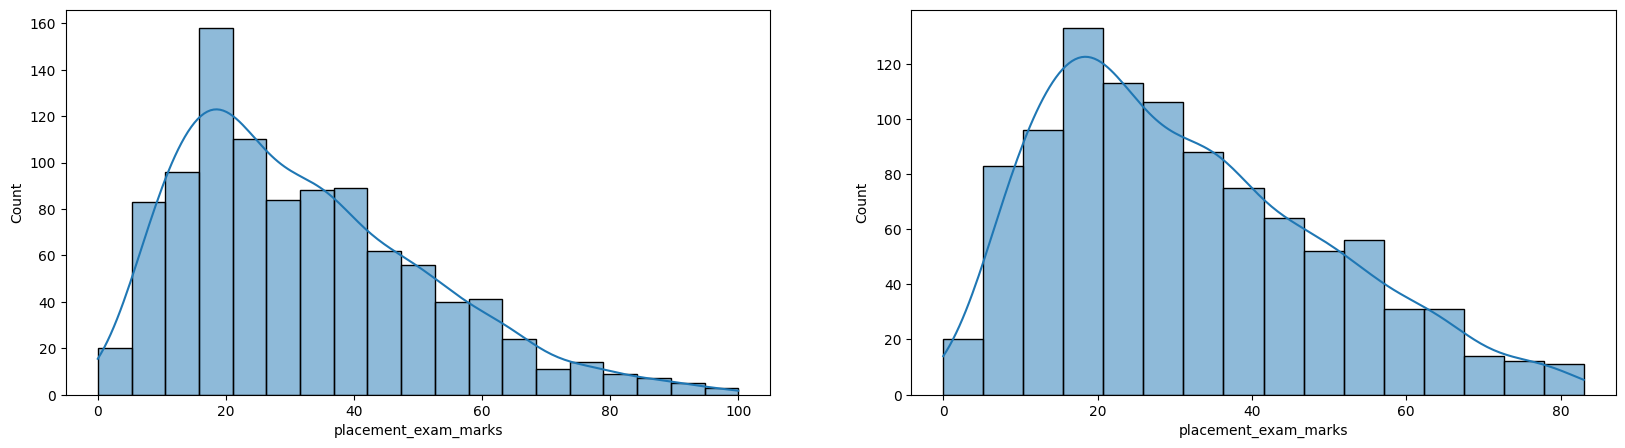

In [50]:
# comparing
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df["placement_exam_marks"],kde=True)
plt.subplot(1,2,2)
sns.histplot(new_df["placement_exam_marks"],kde=True)
plt.show()

<Axes: >

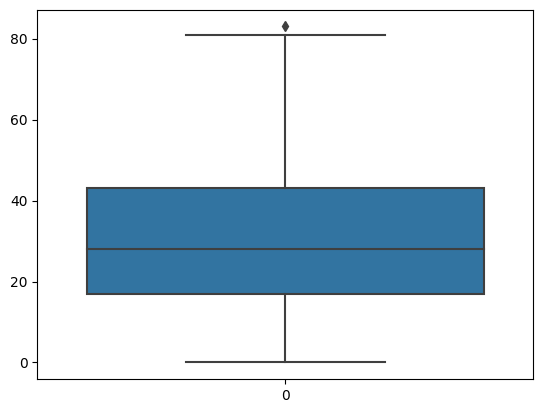

In [51]:
sns.boxplot(new_df["placement_exam_marks"])

<h3>capping</h3>

In [57]:
new_df = pd.DataFrame(df,columns=df.columns)
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [58]:
new_df["placement_exam_marks"] = np.where(new_df["placement_exam_marks"]>upper_limit,upper_limit,
                                          np.where(new_df["placement_exam_marks"]<lower_limit,lower_limit,new_df["placement_exam_marks"]))


<Axes: >

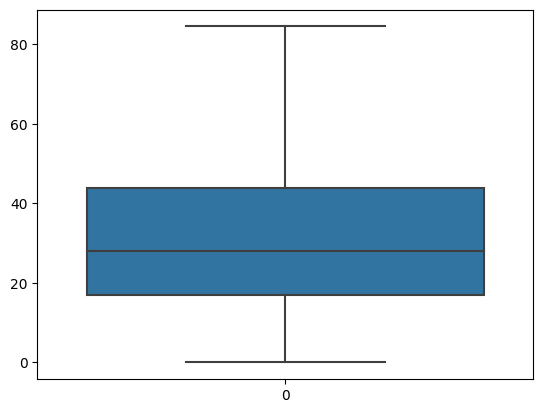

In [60]:
sns.boxplot(new_df["placement_exam_marks"])